# Prosper Loan Analysis
## by Andrey Kabanov

## Investigation Overview

I explored the Prosper loan dataset to find out what factors contribute to lower interest rate on a loan.

## Dataset Overview

The Prosper loan dataset consists of about 113,000 records (loans) with 81 rows (features) for each of the loans.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [11]:
# Convert CreditGrade and ProsperScore to an ordered type
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How is Borrower Rate distributed?

* `BorrowerRate` is normally distributed with a slight left skew
* There's a large spike around the `30%` value

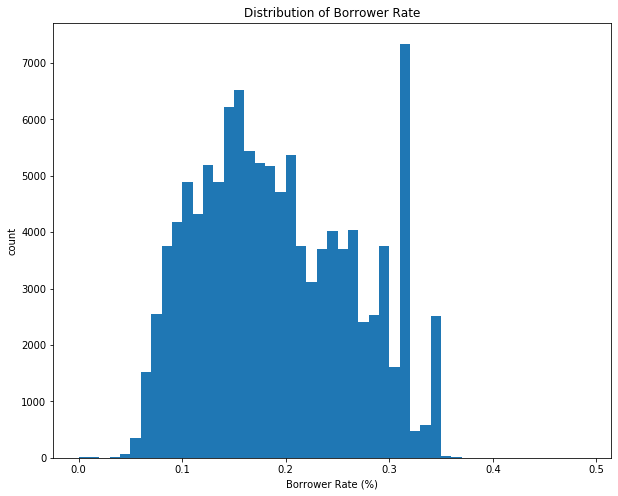

In [12]:
# Plot the distribution of BorrowerRate
rate_bins = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max(), 0.01)

plt.figure(figsize = [10, 8])

plt.hist(data=df, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate (%)');
plt.ylabel('count')
plt.title('Distribution of Borrower Rate');

## What factors contribute to a loan's interest rate?

* A subset of features was explored
* `ProsperRating (numeric)` is highly correlated
* The `ProsperScore` is somewhat correlated...I wonder why...?
* And the `DebtToIncomeRatio` is not correlated at all

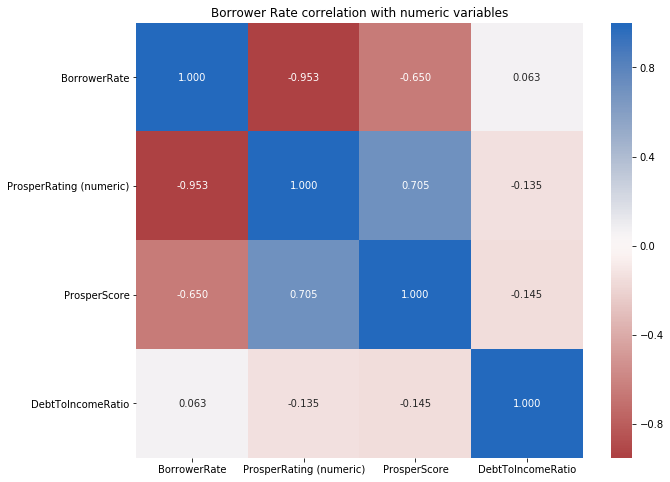

In [13]:
corr_df = df[['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio']]

# correlation plot of numeic variables
plt.figure(figsize = [10, 8])
sb.heatmap(corr_df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Borrower Rate correlation with numeric variables')


# fix for mpl bug that cuts off top/bottom of seaborn viz
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation=0);
plt.show() # ta-da!


## Why is `ProsperScore` not well correlated to the `BorrowerRate`?

* Higher/better `ProsperScore` values are distributed acorss all the different `ProsperRating(s)`
* It must use a different criteria for generating it's value than the rest of the credit risk features
* An opportunity for a future analysis...



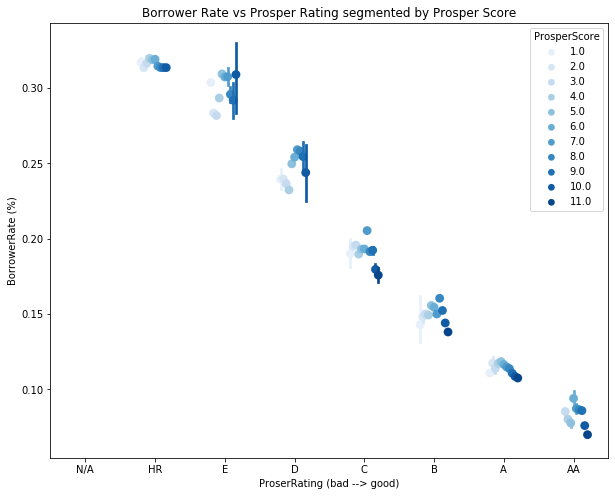

In [14]:
fig = plt.figure(figsize=[10,8])

ax = sb.pointplot(data=df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='ProsperScore',
                  dodge=0.4, linestyles='', palette='Blues');
plt.title('Borrower Rate vs Prosper Rating segmented by Prosper Score')
plt.xlabel('ProserRating (bad --> good)');
plt.ylabel('BorrowerRate (%)');

## So...Who pays the lowest interest rate?

* Loans in the **"higher"** (better) credit risk rating (`ProsperRating (numeric)`)
    * Seen across all the rating levels with no overlap
* Shorter term loans
    * 12 months is less than 36 months
    * 36 months  is less than 60 months


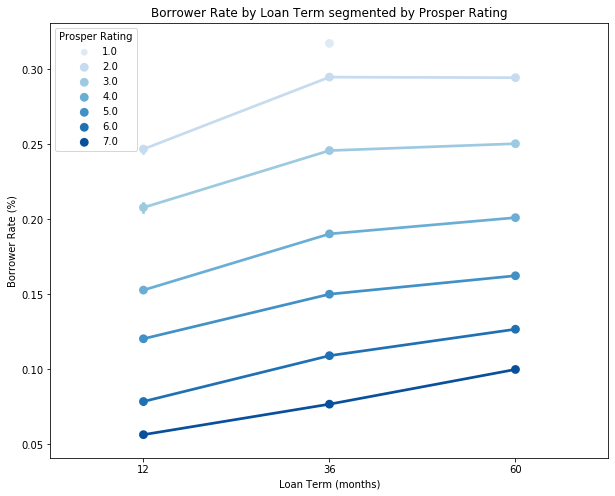

In [15]:
fig = plt.figure(figsize=[10,8])

ax = sb.pointplot(data=df, x='Term', y='BorrowerRate', hue='ProsperRating (numeric)',
                   palette='Blues');
plt.legend(loc=2, title='Prosper Rating');
plt.ylabel('Borrower Rate (%)')
plt.xlabel('Loan Term (months)')
plt.title('Borrower Rate by Loan Term segmented by Prosper Rating');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!